# 1. Read the data

In [5]:
import pandas as pd
import numpy as np

In [2]:
# Read the labeled training and test data
# Header = 0 indicates that the first line of the file contains column names, 
# delimiter = \t indicates that the fields are seperated by tabs, and 
# quoting = 3 tells python to ignore doubled quotes

train = pd.read_csv("labeledTrainData.tsv", header = 0, delimiter = "\t", quoting = 3)
test = pd.read_csv("testData.tsv", header = 0, delimiter = "\t", quoting = 3)

In [3]:
print(train.shape)
print(test.shape)

(25000, 3)
(25000, 2)


In [4]:
# Let's check the first review.

train.iloc[0]["review"]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

As you can see the above review, the html tags are disturbing and also in order to make the data machine-learning friendly, we need to clean the data.

## 3. Data Cleaning and Text Preprocessing
### 3.1. Removing HTML Markup by using BeautifulSoup Package

In [6]:
from bs4 import BeautifulSoup

In [8]:
example1 = BeautifulSoup(train["review"][0], "html.parser")
print("Before cleaning: ",example1)

# Without the second argument "html.parser", it will pop out the warning message.
print("Post cleaning: ",example1.get_text())

Before cleaning:  "With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br/><br/>Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br/><br/>The actual feature film bit when 

### 3.2. Removing Non-Letter Characters & Converting Reviews to Lower Case
It may be important to include some punctuations and numbers such as :-). However for this project, for simplicity, we remove both of them.

In [9]:
import re

letters = re.sub("[^a-zA-Z]", " ", example1.get_text())
letters = letters.lower()
print(letters)

 with all this stuff going down at the moment with mj i ve started listening to his music  watching the odd documentary here and there  watched the wiz and watched moonwalker again  maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  some of it has subtle messages about mj s feeling towards the press and also the obvious message of drugs are bad m kay visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyway then you are going to hate this and find it boring  some may call mj an egotist for consenting to the making of this movie but mj and most of his fans would say that he made it for the fans which if true is really nice of him the actual feature film bit when it finally starts is only on for    mi

### 3.3. Tokenization

Tokenization is the process splitting a sentence or paragraph into the most basic units.

In [10]:
# Import Natural Language Toolkit
import nltk

In [11]:
# Instead of using just split() method, used word_tokenize in nltk library.
word = nltk.word_tokenize(letters)
print(word)

['with', 'all', 'this', 'stuff', 'going', 'down', 'at', 'the', 'moment', 'with', 'mj', 'i', 've', 'started', 'listening', 'to', 'his', 'music', 'watching', 'the', 'odd', 'documentary', 'here', 'and', 'there', 'watched', 'the', 'wiz', 'and', 'watched', 'moonwalker', 'again', 'maybe', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into', 'this', 'guy', 'who', 'i', 'thought', 'was', 'really', 'cool', 'in', 'the', 'eighties', 'just', 'to', 'maybe', 'make', 'up', 'my', 'mind', 'whether', 'he', 'is', 'guilty', 'or', 'innocent', 'moonwalker', 'is', 'part', 'biography', 'part', 'feature', 'film', 'which', 'i', 'remember', 'going', 'to', 'see', 'at', 'the', 'cinema', 'when', 'it', 'was', 'originally', 'released', 'some', 'of', 'it', 'has', 'subtle', 'messages', 'about', 'mj', 's', 'feeling', 'towards', 'the', 'press', 'and', 'also', 'the', 'obvious', 'message', 'of', 'drugs', 'are', 'bad', 'm', 'kay', 'visually', 'impressive', 'but', 'of', 'course', 'this', 'is', 'all', 'about', 

### 3.4. Removing Stop words
"Stop words" is the frequently occurring words that do not carry much meaning such as "a", "and" , "is", "the". In order to use the data as input for machine learning algorithms, we need to get rid of them. Fortunately, there is a function called stopwords which is already built in NLTK library.

In [12]:
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
# Exclude the stop words from the original tokens.
word = [w for w in word if not w in set(stopwords.words("english"))]

### 3.5. Stemming / Lemmatization 

It is important to know the difference between these two.

- __Stemming:__ Stemming algorithms work by cutting off the end of the word, and in some cases also the beginning while looking for the root. This indiscriminate cutting can be successful in some occasions, but not always, that is why we affirm that this an approach that offers some limitations. ex) studying -> study, studied -> studi <br>
<br>
- __Lemmatization:__ Lemmatization is the process of converting the words of a sentence to its dictionary form. For example, given the words amusement, amusing, and amused, the lemma for each and all would be amuse. ex) studying -> study, studied -> study. Lemmatization also discerns the meaning of the word by understanding the context of a passage. For example, if a "meet" is used as a noun then it will print out a "meeting"; however, if it is used as a verb then it will print out "meet".  
<br>

Usually, either one of them is chosen for text-analysis not both. As a side note, Lancaster is the most aggressive stemmer among three major stemming algorithms (Porter, Snowball, Lancaster) and Porter is the least aggressive. The "aggressive algorithms" means how much a working set of words are reduced. The more aggressive the algorithms, the faster it is; however, in some certain circumstances, it will hugely trim down your working set. Therefore, in this project I decide to use snowball since it is slightly faster than Porter and does not trim down too much information as Lancaster does.

In [14]:
snow = nltk.stem.SnowballStemmer('english')
stems = [snow.stem(w) for w in word]
print(stems)

['stuff', 'go', 'moment', 'mj', 'start', 'listen', 'music', 'watch', 'odd', 'documentari', 'watch', 'wiz', 'watch', 'moonwalk', 'mayb', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'realli', 'cool', 'eighti', 'mayb', 'make', 'mind', 'whether', 'guilti', 'innoc', 'moonwalk', 'part', 'biographi', 'part', 'featur', 'film', 'rememb', 'go', 'see', 'cinema', 'origin', 'releas', 'subtl', 'messag', 'mj', 'feel', 'toward', 'press', 'also', 'obvious', 'messag', 'drug', 'bad', 'kay', 'visual', 'impress', 'cours', 'michael', 'jackson', 'unless', 'remot', 'like', 'mj', 'anyway', 'go', 'hate', 'find', 'bore', 'may', 'call', 'mj', 'egotist', 'consent', 'make', 'movi', 'mj', 'fan', 'would', 'say', 'made', 'fan', 'true', 'realli', 'nice', 'actual', 'featur', 'film', 'bit', 'final', 'start', 'minut', 'exclud', 'smooth', 'crimin', 'sequenc', 'joe', 'pesci', 'convinc', 'psychopath', 'power', 'drug', 'lord', 'want', 'mj', 'dead', 'bad', 'beyond', 'mj', 'overheard', 'plan', 'nah', 'joe', 'pesci', 

As you can see the word "started", it is converted to "start" and "listening" and "watching" are converted to "listen" and "watch".

### 3.6. Putting It All Together
So far, we have cleaned only one datapoint. Now it's time to apply all the cleaning process to all the data.<br>
To make the code reusable, we need to create a function that can be called many times.

In [16]:
def cleaning(raw_review):
    import nltk
    
    # 1. Remove HTML.
    html_text = BeautifulSoup(raw_review,"html.parser").get_text()
    
    # 2. Remove non-letters.
    letters = re.sub("[^a-zA-Z]", " ", html_text)
    
    # 3. Convert to lower case.
    letters = letters.lower()
    
    # 4. Tokenize.
    tokens = nltk.word_tokenize(letters)
    
    # 5. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 6. Remove stop words. 
    words = [w for w in tokens if not w in stops]
    
    # 7. Stemming
    words = [nltk.stem.SnowballStemmer('english').stem(w) for w in words]
    
    # 8. Join the words back into one string separated by space, and return the result.
    return " ".join(words)

In [17]:
# comment this section when running
train=train.sample(n=1000)
test=train.sample(n=200)

In [18]:
# Add the processed data to the original data. Perhaps using apply function would be more elegant and concise than using for loop
train['clean'] = train['review'].apply(cleaning)
test['clean'] = test['review'].apply(cleaning)

C:\Users\arvenka\AppData\Local\Temp\ipykernel_17312\3954995545.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  html_text = BeautifulSoup(raw_review,"html.parser").get_text()


In [19]:
train.head()

,id,sentiment,review,clean
17263,"""7876_2""",0,"""At a panel discussion that I attended after v...",panel discuss attend view film filmmak state o...
16027,"""4607_4""",0,"""You can't imagine how I looked forward to Kin...",imagin look forward king ant massiv gordon fan...
11321,"""1564_3""",0,"""...was so that I could, in good conscience, t...",could good conscienc tell everyon horribl movi...
9996,"""65_4""",0,"""I don't quite get the rating for The Amati Gi...",quit get rate amati girl think realli kind giv...
24500,"""11815_3""",0,"""This insipid mini operetta featuring a Eddy-M...",insipid mini operetta featur eddi mcdonald pro...


In [20]:
test.head()

,id,sentiment,review,clean
8375,"""3945_4""",0,"""My Name is Modesty is a low-budget film that ...",name modesti low budget film tell stori origin...
13869,"""1404_3""",0,"""Arthur Askey's great skill as a comic was in ...",arthur askey great skill comic way communic pu...
2297,"""6111_10""",1,"""I first came across 'My Tutor Friend' acciden...",first came across tutor friend accident one tw...
1356,"""10779_10""",1,"""A classic cartoon, always enjoyable and funny...",classic cartoon alway enjoy funni interest plo...
241,"""5290_3""",0,"""I'm not usually one to slate a film . I try t...",usual one slate film tri see good point focus ...


# 4 Visualisations

### 4.1 WordCloud <a id='wc'></a>

As a tool for visualization by using the frequency of words appeared in text, we use WordCloud. Note that it can give more information and insight of texts by analyzing correlations and similarities between words rather than analyzing texts only by the frequency of words appeared; however, it can give you some general shape of what this text is about quickly and intuitively. 

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [30]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    #Use this for faster processing : max_words=100
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

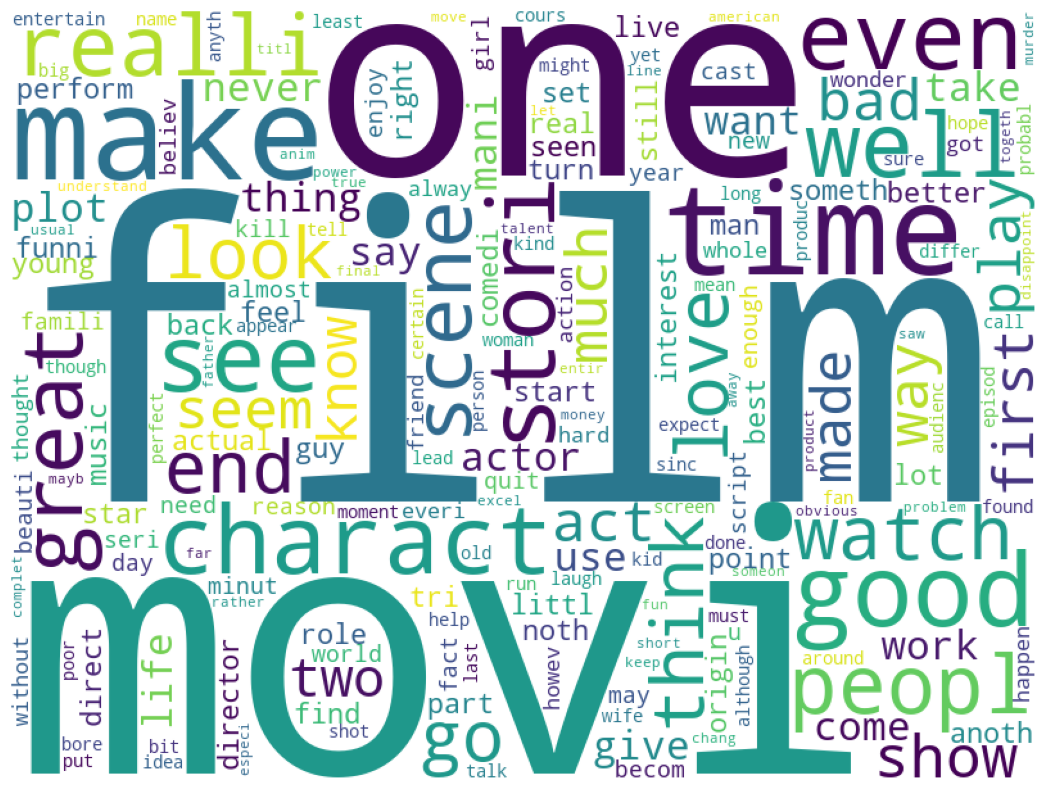

In [32]:
cloud(' '.join(train['clean']))


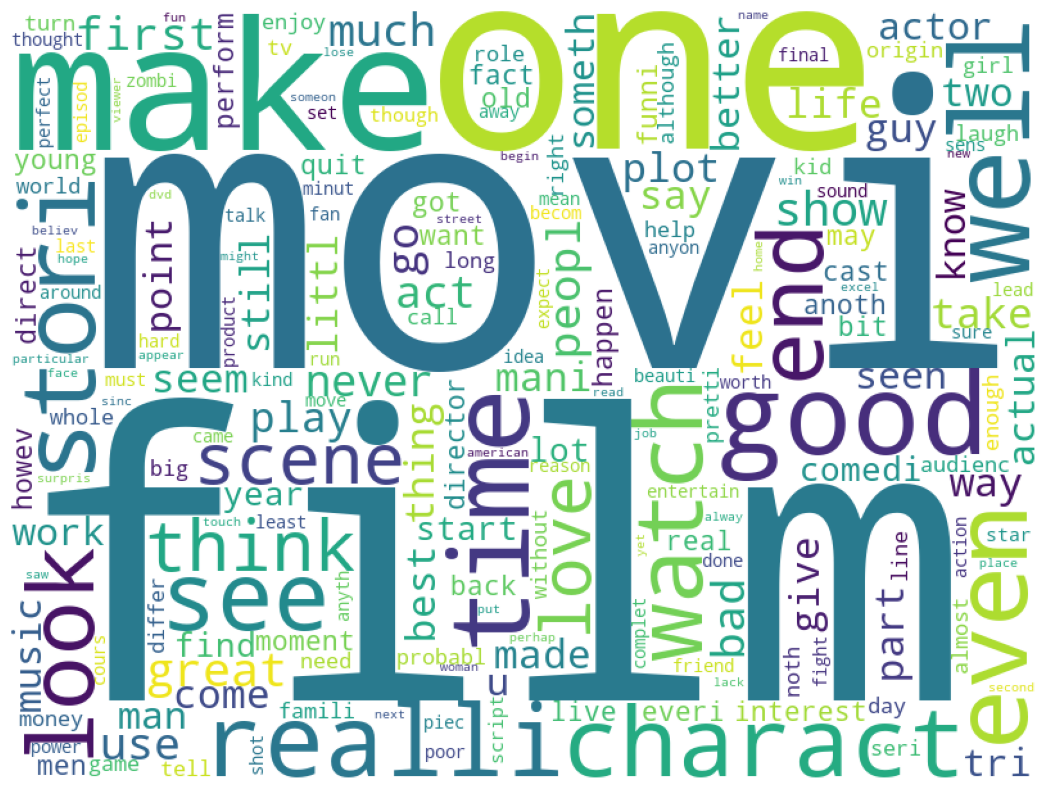

In [33]:
cloud(' '.join(test['clean']))

It is not surprising that the most of large words are just the words frequently appeared in the text.

### 4.2 Distribution

In [26]:
# We need to split each words in cleaned review and then count the number of each rows of data frame.

train['freq_word'] = train['clean'].apply(lambda x: len(str(x).split()))
train['unique_freq_word'] = train['clean'].apply(lambda x: len(set(str(x).split())))
                                                 
test['freq_word'] = test['clean'].apply(lambda x: len(str(x).split()))
test['unique_freq_word'] = test['clean'].apply(lambda x: len(set(str(x).split())))    

In [27]:
train['unique_freq_word'].describe()
test['unique_freq_word'].describe()

count    200.000000
mean      90.135000
std       57.499371
min       16.000000
25%       53.000000
50%       72.000000
75%      109.750000
max      409.000000
Name: unique_freq_word, dtype: float64

C:\Users\arvenka\AppData\Local\Temp\ipykernel_17312\324762360.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['freq_word'], bins = 90, ax=axes[0], fit = stats.norm)
C:\Users\arvenka\AppData\Local\Temp\ipykernel_17312\324762360.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[

<Axes: xlabel='unique_freq_word', ylabel='Density'>

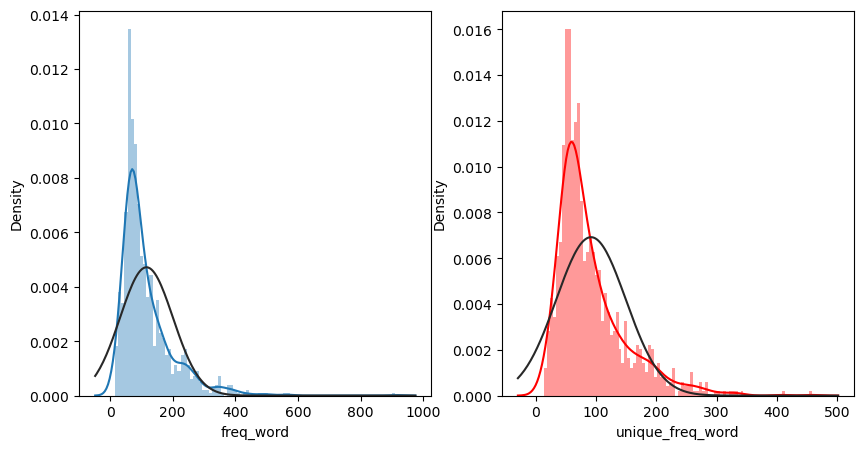

In [36]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(10,5)

sns.distplot(train['freq_word'], bins = 90, ax=axes[0], fit = stats.norm)
# (mu0, sigma0) = stats.norm.fit(train['freq_word'])
# axes[0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu0, sigma0)],loc='best')
# axes[0].set_title("Distribution Word Frequency")
# axes[0].axvline(train['freq_word'].median(), linestyle='dashed')
# print("median of word frequency: ", train['freq_word'].median())


sns.distplot(train['unique_freq_word'], bins = 90, ax=axes[1], color = 'r', fit = stats.norm)
# (mu1, sigma1) = stats.norm.fit(train['unique_freq_word'])
# axes[1].set_title("Distribution Unique Word Frequency")
# axes[1].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu1, sigma1)],loc='best')
# axes[1].axvline(train['unique_freq_word'].median(), linestyle='dashed')
# print("median of uniuqe word frequency: ", train['unique_freq_word'].median())

The black contour of the distribution graphs represent the normal distribution if the data would have been distributed as normal. Compared to the black contour, the actual distribution is pretty skwed; therefore, median would be better to use as a measure of representative of data since mean is very sensitive to outliers and noise especially the distribution is highly skewed. As shown in the legend, the mean of the word frequency is 119.50 and the mean of the unique word is 94.04. It means 119.50 words and 94.04 unique words are used for each review. Also the dashed lines represent the median of the distribution. Another thing to notice is that the median values are very closely located to the normal distribution's mean points.

## 5. Bag of Words

Even though we cleaned the data with many steps, we still have one more step to create machine learning-friendly input. One common approach is called a Bag of Words. It is simply the matrix that counts how many each word appears in documents (disregard grammar and word order). In order to do that, we use "CountVectorizer" method in sklearn library. As you know already, the number of vocabulary is very large so it is important to limit the size of the feature vectors. In this project, we use the 18000 most frequent words. Also, the other things to notice is that we set min_df = 2 and ngram_range = (1,3). min_df = 2 means in order to include the vocabulary in the matrix, one word must appear in at least two documents. ngram_range means we cut one sentence by number of ngram. Let's say we have one sentence, I am a boy. If we cut the sentence by digram (ngram=2) then the sentence would be cut like this ["I am","am a", "a boy"]. The result of accuracy can be highly dependent on parameters so feel free to alter them and see if you can improve the score.

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
vectorizer = CountVectorizer(analyzer = "word", 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 18000,
                             min_df = 2,
                             ngram_range = (1,3)
                            )

As mentioned many times, the matrix is going to be huge so it would be a good idea to use Pipeline for encapsulating and avoiding a data leakage.

In [41]:
from sklearn.pipeline import Pipeline

In [42]:
pipe = Pipeline( [('vect', vectorizer)] )

In [43]:
# Complete form of bag of word for machine learning input. We will be using this for machine learning algorithms.

train_bw = pipe.fit_transform(train['clean'])

# We only call transform not fit_transform due to the risk of overfitting.

test_bw = pipe.transform(test['clean'])

In [44]:
print('train dim:', train_bw.shape, 'test dim:', test_bw.shape)

train dim: (1000, 15168) test dim: (200, 15168)


In [45]:
# Get the name fo the features

lexi = vectorizer.get_feature_names_out()
lexi

array(['abandon', 'abc', 'abe', ..., 'zorro realli', 'zz', 'zz top'],
      dtype=object)

In [46]:
# Instead of 1 and 0 representation, create the dataframe to see how many times each word appears (just sum of 1 of each row)

train_sum = pd.DataFrame(np.sum(train_bw, axis=0), columns = lexi)
train_sum.head()

,abandon,abc,abe,abil,abil make,abl,abl find,abl get,abl make,abl portray,...,zombi film,zombi movi,zombi movi fan,zone,zoo,zoom,zorro,zorro realli,zz,zz top
0,11,5,3,28,2,44,2,3,3,2,...,3,9,2,3,2,4,8,2,2,2


## 6. Modeling

As text data usually is very sparse and has a high dimensionality, using linear, and simple models such as Linear Support Vector Machine, Bernoulli Naive Bayes, Logistic Regression or MultiLayer Perceptron would be better choice rather than using Random Forest. 

In [48]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

In [49]:
kfold = StratifiedKFold( n_splits = 5 )

### 6.1 Support Vector Machine

In [51]:
# LinearSVC

sv = LinearSVC(random_state=2018)

param_grid2 = {
    'loss':['hinge'],
    'class_weight':[{1:1}],
    'C': [0.01]
}

gs_sv = GridSearchCV(sv, param_grid = [param_grid2], verbose = 1, cv = kfold, n_jobs = -1, scoring = 'roc_auc' )
gs_sv.fit(train_bw, train['sentiment'])
gs_sv_best = gs_sv.best_estimator_
print(gs_sv.best_params_)

# {'C': 0.01, 'class_weight': {1: 1}, 'loss': 'hinge'} - 0.88104

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'C': 0.01, 'class_weight': {1: 1}, 'loss': 'hinge'}


In [52]:
submission1 = gs_sv.predict(test_bw)
print(gs_sv.best_score_)

0.8898013390774852


### 6.2 Bernoulli Naive Bayes Classifier

In [53]:
bnb = BernoulliNB()
gs_bnb = GridSearchCV(bnb, param_grid = {'alpha': [0.03],
                                         'binarize': [0.001]}, verbose = 1, cv = kfold, n_jobs = -1, scoring = 'roc_auc')
gs_bnb.fit(train_bw, train['sentiment'])
gs_bnb_best = gs_bnb.best_estimator_
print(gs_bnb.best_params_)

# {'alpha': 0.1, 'binarize': 0.001} - 0.85240
# {'alpha': 0.03, 'binarize': 0.001} - 0.85240

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'alpha': 0.03, 'binarize': 0.001}


In [54]:
submission2 = gs_bnb.predict(test_bw)
print(gs_bnb.best_score_)

0.8531943170307427


### 6.3 Perceptron

In [55]:
MLP = MLPClassifier(random_state = 2018)

mlp_param_grid = {
    'hidden_layer_sizes':[(1,)],
    'activation':['logistic'],
    'solver':['sgd'],
    'alpha':[0.1],
    'learning_rate':['constant'],
    'max_iter':[1000]
}

gsMLP = GridSearchCV(MLP, param_grid = mlp_param_grid, cv = kfold, scoring = 'roc_auc', n_jobs= -1, verbose = 1)
gsMLP.fit(train_bw,train['sentiment'])
print(gsMLP.best_params_)
mlp_best0 = gsMLP.best_estimator_

# {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (1,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'sgd'} - 0.87732
# {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'sgd'} - 0.87632

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (1,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'sgd'}


In [56]:
submission3 = gsMLP.predict(test_bw)
print(gsMLP.best_score_)

0.6112182826926149


### 6.4 Logistic Regression

In [57]:
lr = LogisticRegression(random_state = 2018)


lr2_param = {
    'penalty':['l2'],
    'dual':[False],
    'C':[0.05],
    'class_weight':['balanced']
    }

lr_CV = GridSearchCV(lr, param_grid = [lr2_param], cv = kfold, scoring = 'roc_auc', n_jobs = -1, verbose = 1)
lr_CV.fit(train_bw, train['sentiment'])
print(lr_CV.best_params_)
logi_best = lr_CV.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'C': 0.05, 'class_weight': 'balanced', 'dual': False, 'penalty': 'l2'}


In [58]:
submission4 = lr_CV.predict(test_bw)
print(lr_CV.best_score_)

0.8929418572109313


## 7. TF-IDF

TF-IDF (Term Frequency - Inverse Document Frequency) can be represented tf(d,t) X idf(t). TF-IDF uses the method diminishing the weight (importance) of words appeared in many documents in common, considered them incapable of discerning the documents, rather than simply counting the frequency of words as CountVectorizer does. The outcome matrix consists of each document (row) and each word (column) and the importance (weight) computed by tf * idf (values of the matrix).

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import words

In [60]:
# analyzer is the parameter that the vectorizer reads the input data in word unit or character unit to create a matrix
# vocabulary is the parameter that the vectorizer creates the matrix by using only input data or some other source 
# Other parameters are self-explanatory and already mentioned in other notebooks.

tv = TfidfVectorizer(
                    ngram_range = (1,3),
                    sublinear_tf = True,
                    max_features = 18000)

In [61]:
# Handle with care especially when you transform the test dataset. (Wrong: fit_transform(X_test))

train_tv = tv.fit_transform(train['clean'])
test_tv = tv.transform(test['clean'])

In [62]:
# Create the list of vocabulary used for the vectorizer.

vocab = tv.get_feature_names_out()
print(vocab[:5])

['aag' 'abandon' 'abc' 'abe' 'abil']


In [63]:
print("Vocabulary length:", len(vocab))

Vocabulary length: 18000


In [64]:
dist = np.sum(train_tv, axis=0)
checking = pd.DataFrame(dist,columns = vocab)
print(checking)

        aag   abandon      abc       abe      abil  abil make       abl  \
0  0.149985  0.753315  0.48068  0.257686  1.970395   0.203874  2.443748   

   abl find   abl get  abl make  ...      zone       zoo      zoom     zorro  \
0  0.132649  0.269328  0.229253  ...  0.237287  0.126175  0.347858  0.717313   

   zorro realli       zsa        zu  zu warrior        zz    zz top  
0      0.303364  0.112373  0.260916    0.229461  0.212037  0.212037  

[1 rows x 18000 columns]


In [65]:
print('Training dim:',train_tv.shape, 'Test dim:', test_tv.shape)

Training dim: (1000, 18000) Test dim: (200, 18000)


# Modelling

In [66]:
# LinearSVC

sv = LinearSVC(random_state=2018)

param_grid2 = {
    'loss':['squared_hinge'],
    'class_weight':[{1:4}],
    'C': [0.2]
}


gs_sv = GridSearchCV(sv, param_grid = [param_grid2], verbose = 1, cv = kfold, n_jobs = 1, scoring = 'roc_auc')
gs_sv.fit(train_tv, train['sentiment'])
gs_sv_best = gs_sv.best_estimator_
print(gs_sv.best_params_)

# {'C': 0.1, 'class_weight': {1: 3}, 'loss': 'squared_hinge'} - 0.87220
# {'C': 0.1, 'class_weight': {1: 4}, 'loss': 'squared_hinge'} - 0.86060
# {'C': 0.2, 'class_weight': {1: 4}, 'loss': 'squared_hinge'} - 0.87952

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'C': 0.2, 'class_weight': {1: 4}, 'loss': 'squared_hinge'}


In [67]:
submission1 = gs_sv.predict(test_tv)
print(gs_sv.best_score_)

0.9213859741316268


In [68]:
# Bernoulli Naive Bayes Classifier
bnb = BernoulliNB()
gs_bnb = GridSearchCV(bnb, param_grid = {'alpha': [0.001],
                                         'binarize': [0.001]}, verbose = 1, cv = kfold, n_jobs = 1, scoring = "roc_auc")
gs_bnb.fit(train_tv, train['sentiment'])
gs_bnb_best = gs_bnb.best_estimator_
print(gs_bnb.best_params_)

# {'alpha': 0.001, 'binarize': 0.001} - 0.86960

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'alpha': 0.001, 'binarize': 0.001}


In [69]:
submission2 = gs_bnb.predict(test_tv)
print(gs_bnb.best_score_)

0.8226491646763716


In [70]:
#Perceptron
MLP = MLPClassifier(random_state = 2018)

mlp_param_grid = {
    'hidden_layer_sizes':[(5)],
    'activation':['relu'],
    'solver':['adam'],
    'alpha':[0.3],
    'learning_rate':['constant'],
    'max_iter':[1000]
}


gsMLP = GridSearchCV(MLP, param_grid = mlp_param_grid, cv = kfold, scoring = 'roc_auc', n_jobs= 1, verbose = 1)
gsMLP.fit(train_tv,train['sentiment'])
print(gsMLP.best_params_)
mlp_best0 = gsMLP.best_estimator_

# {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (1,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'} - 0.89996
# {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'} - 0.89896
# {'activation': 'relu', 'alpha': 0.2, 'hidden_layer_sizes': (1,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'} - 0.90284
# {'activation': 'relu', 'alpha': 0.3, 'hidden_layer_sizes': (5,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'} - 0.90356

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'activation': 'relu', 'alpha': 0.3, 'hidden_layer_sizes': 5, 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}


In [71]:
submission3 = gsMLP.predict(test_tv)
print(gsMLP.best_score_)

0.9203057160457944


In [72]:
lr = LogisticRegression(random_state = 2018)


lr2_param = {
    'penalty':['l2'],
    'dual':[False],
    'C':[0.05],
    'class_weight':['balanced']
    }

lr_CV = GridSearchCV(lr, param_grid = [lr2_param], cv = kfold, scoring = 'roc_auc', n_jobs = -1, verbose = 1)
lr_CV.fit(train_tv, train['sentiment'])
print(lr_CV.best_params_)
logi_best = lr_CV.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'C': 0.05, 'class_weight': 'balanced', 'dual': False, 'penalty': 'l2'}


In [73]:
# {'C': 6, 'class_weight': {1: 1}, 'dual': True, 'penalty': 'l2'} - 90.360

submission6 = lr_CV.predict(test_tv)
print(lr_CV.best_score_)

0.9101841456654668


# Word2Vec
In general, there are two types of architecture options: skip-gram (default) and CBOW (continuous bag of words). Most of time, skip-gram is little bit slower but has more accuracy than CBOW. CBOW is the method to predict one word by whole text; therefore, small set of data is more favorable. On the other hand, skip-gram is totally opposite to CBOW. With the target word, skip-gram is the method to predict the words around the target words. The more data we have, the better it performs. As the architecture, there are two training algorithms for Word2Vec: Hierarchical softmax (default) and negative sampling. We will be using the default.

In [87]:
from gensim.models import word2vec

In [88]:
num_features = 250 #400
min_count = 40
num_processor = 4
context = 10
downsampling = 0.001

In [89]:
def preprocess_wordlist(data, stopwords = False):
    
    # Remove HTML tag
    review = BeautifulSoup(data,'html.parser').get_text()
    
    # Remove non-letters
    review = re.sub('[^a-zA-Z]', ' ', review)
    
    # Convert to lower case
    review = review.lower()
    
    # Tokenize
    word = nltk.word_tokenize(review)
    
    # Optional: Remove stop words (false by default)
    if stopwords:
        stops = set(nltk.corpus.stopwords.words("english"))
        
        words = [w for w in word if not w in stops]
    
    return word


In [90]:
def preprocess_sent(data, stopwords = False):
    
    # Split the paragraph into sentences
    
    #raw = tokenizer.tokenize(data.strip())
    raw = nltk.sent_tokenize(data.strip())
    
    # If the length of the sentence is greater than 0, plug the sentence in the function preprocess_wordlist (clean the sentence)
    sentences = [preprocess_wordlist(sent, stopwords) for sent in raw if len(sent) > 0]
    
    return sentences

In [91]:
sentence = []

# Append labeled reviews first
for review in train['review']:
    sentence += preprocess_sent(review)
    
# Append unlabeled reviews
for review in test['review']:
    sentence += preprocess_sent(review)


C:\Users\arvenka\AppData\Local\Temp\ipykernel_17312\2557937402.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review = BeautifulSoup(data,'html.parser').get_text()


In [92]:
# Plug in the sentence variable first.

model = word2vec.Word2Vec(sentence, workers = num_processor, 
                         vector_size = num_features, min_count = min_count,
                         window = context, sample = downsampling)

Worker threads : Number of parallel processes to run. One thing to remember here is that unlike sklearn, it does not accept -1 option to use all the processors. <br>

Downsampling of frequent words : According to the Google documentation, values between 0.00001 and 0.001 would suffice. <br>

Context : How many words around the target word will be used? <br>

Minimum word count: This helps limit the size of the vocabulary to meaningful words. Any word that does not occur at least this many times across all documents is ignored. Reasonable values could be between 10 and 100. The reason why I chose 40 is that there are 30 reviews in each movie and repeat the title 30 times; therefore in order to avoid attaching too much importance to individual movie titles, I set to 40. <br>

Word vector dimensionality: Self-explanatory. 


In [93]:
# Unload unneccessary memory once the learning process is done.
model.init_sims(replace = True)

C:\Users\arvenka\AppData\Local\Temp\ipykernel_17312\2697696663.py:2: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace = True)


In [94]:
model_name = "250features_40minwords_20context"
model.save(model_name)

In [95]:
model.wv.most_similar("poor")

[('cinematography', 0.9954051375389099),
 ('direction', 0.9952118992805481),
 ('slow', 0.9948213696479797),
 ('lack', 0.9945757389068604),
 ('screenplay', 0.9937775731086731),
 ('particularly', 0.9935063719749451),
 ('memorable', 0.993279218673706),
 ('editing', 0.9927036762237549),
 ('set', 0.9924783706665039),
 ('audience', 0.9916915893554688)]

In [96]:
model.wv.most_similar(positive=['good','great'], negative=['bad'])

[('very', 0.9475890398025513),
 ('its', 0.9333322644233704),
 ('acting', 0.9196149110794067),
 ('cast', 0.8978036642074585),
 ('action', 0.895781397819519),
 ('music', 0.8847762942314148),
 ('best', 0.8837563991546631),
 ('which', 0.8746689558029175),
 ('performances', 0.8627520799636841),
 ('excellent', 0.8564040660858154)]

In [97]:
rock_idx = model.wv.key_to_index["rock"]   
rock_cnt = model.wv.get_vecattr("rock", "count")  
vocab_len = len(model.wv)  

KeyError: 'rock'

In [98]:
rock_idx,rock_cnt,vocab_len

NameError: name 'rock_idx' is not defined

## From Words To Paragraphs, Attempt 1: Vector Averaging

One challenge with the IMDB dataset is the variable-length reviews. We need to find a way to take individual word vectors and transform them into a feature set that is the same length for every review.

Since each word is a vector in 300-dimensional space, we can use vector operations to combine the words in each review. One method is to simply average the word vectors in a given review (for this purpose, we removed stop words, which would just add noise). We add all up all values of the 300-dimensionl word vectors in one review and divide it by the number of words in the review. 

##### Example with a 2 word review:

Vector1 = (0.1, 0.3, 0.5, ...) = word 1  
Vector2 = (0.2, 0.5, 0.6, ...) = word 2  

average_Vector = (Vector1 + Vector2)/2 = [(0.1, 0.3, 0.5, ...)+(0.2, 0.5, 0.6, ...)]/2 = (0.3, 0.8, 1.1, ...)/2  
average_Vector = (0.15, 0.4, 0.55, ...)

In [99]:
def makeFeatureVec(words, model, vector_dimensionality):
    # Function to average all of the word vectors in a given
    # paragraph
    #
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((vector_dimensionality,),dtype='float32')
    #
    number_of_words = 0.
    # 
    # Index2word is a list that contains the names of the words in 
    # the model's vocabulary. Convert it to a set, for speed 
    index2word_set = set(model.wv.index_to_key)
    #
    # Loop over each word in the review and, if it is in the model's
    # vocaublary, add its feature vector to the total
    for word in words:
        if word in index2word_set: 
            number_of_words = number_of_words + 1.
            featureVec = np.add(featureVec,model.wv.get_vector(word))
    # 
    # Divide the result by the number of words to get the average
    featureVec = np.divide(featureVec,number_of_words)
    return featureVec

def review_to_wordlist(review, remove_stopwords=False):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    #  
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [100]:
# split the train and test reviews into words (stop word removal = True)

print('split train reviews into words')
train['words'] = train['review'].apply(lambda x: review_to_wordlist(x, remove_stopwords=True))
print('split test reviews into words')
test['words'] = test['review'].apply(lambda x: review_to_wordlist(x, remove_stopwords=True))

split train reviews into words


C:\Users\arvenka\AppData\Local\Temp\ipykernel_17312\2732977512.py:30: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review).get_text()


split test reviews into words


In [103]:
# Calculate average feature vectors for train and test

print('calculate average feature vector for train')
train['average_feature_vector'] = train['words'].apply(lambda x: makeFeatureVec(words=x,model=model,vector_dimensionality=model.vector_size))
print('calculate average feature vector for test')
test['average_feature_vector'] = test['words'].apply(lambda x: makeFeatureVec(words=x,model=model,vector_dimensionality=model.vector_size))

calculate average feature vector for train
calculate average feature vector for test


In [107]:
# convert average feature vectors to 300-dimenesional numpy array for random forest classifier
train_average_vectors = list(train['average_feature_vector'])
train_average_vectors = np.asarray(train_average_vectors)
print('shape of train array:',train_average_vectors.shape)

test_average_vectors = list(test['average_feature_vector'])
test_average_vectors = np.asarray(test_average_vectors)
print('shape of test array:',test_average_vectors.shape)

shape of train array: (1000, 250)
shape of test array: (200, 250)


In [111]:
from sklearn.ensemble._forest import RandomForestClassifier

In [112]:
# Random Forest

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
        'n_estimators': [200,400,800],
#     'n_estimators': [100,200],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,8,16,32],
    'criterion' :['gini', 'entropy']
}
gs_rfc = GridSearchCV(rfc, param_grid = [param_grid], verbose = 1, cv = kfold, n_jobs = -1, scoring = 'roc_auc' )
gs_rfc.fit(train_average_vectors, train['sentiment'])
gs_rfc_best = gs_rfc.best_estimator_
print(gs_rfc.best_params_)

# {'C': 0.01, 'class_weight': {1: 1}, 'loss': 'hinge'} - 0.88104

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [113]:
submission1 = gs_rfc.predict(test_average_vectors)
print(gs_rfc.best_score_)

0.7112740745863301
